In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('house_prising.csv')

In [3]:
data.sample(3)

,area,bedroomds,price
3,1521,3,75.0
2,1440,3,62.0
19,800,1,32.0


In [4]:
from sklearn.preprocessing import MinMaxScaler

sx=MinMaxScaler()
sy=MinMaxScaler()
scaled_x=sx.fit_transform(data.drop('price',axis=1))
scaled_y=sy.fit_transform(data['price'].values.reshape(data.shape[0],1))

In [5]:
def batch_gradient_descecnt(x, y_true, epochs, learning_rate=0.1):
    number_of_feature = x.shape[1]
    
    w = np.ones(shape=(number_of_feature))
    b = 0
    total_samples = x.shape[0]
    
    cost_list= []
    epoch_list =[]
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T)+ b
        w_grad = -(2/total_samples)*x.T.dot(y_true-y_predicted)
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list,  epoch_list 
w, b, cost, cost_list, epoch_list = batch_gradient_descecnt(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.75551232, 0.41567569]), -0.11681328268689471, 0.0034249089030269813)

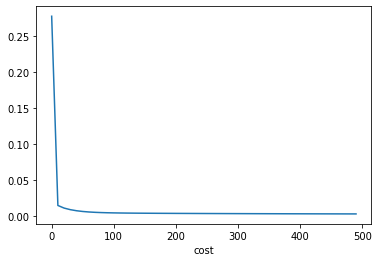

In [22]:
plt.xlabel("epoch")
plt.xlabel("cost")
plt.plot(epoch_list,cost_list)

In [7]:
w

array([0.75551232, 0.41567569])

In [8]:
def predict(area, bedroomds, w,b):
    scaled_x= sx.transform([[area,bedroomds]])[0]
    scaled_price= w[0]*scaled_x[0] + w[1]*scaled_x[1] +b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2000,4,w,b)

100.52185209438589

In [9]:
predict(1310,3,w,b)

62.22522063141144

In [10]:
import random
random.randint(0,5)

5

In [20]:
def stochastic_gradient_descecnt(x, y_true, epochs, learning_rate=0.1):
    number_of_feature = x.shape[1]
    
    w = np.ones(shape=(number_of_feature))
    b = 0
    total_samples = x.shape[0]
    
    cost_list= []
    epoch_list =[]
    for i in range(epochs):
        random_index= random.randint(0,total_samples-1)
        sample_x= x[random_index]
        sample_y= y_true[random_index]
        y_predicted = np.dot(w, sample_x.T)+ b
        w_grad = -(2/total_samples)*sample_x.T.dot(sample_y-y_predicted)
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list,  epoch_list 
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descecnt(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.75551232, 0.41567569]), -0.11681328268689471, 0.0034249089030269813)

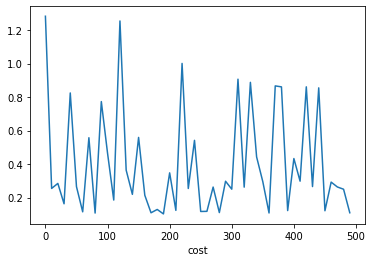

In [23]:
plt.xlabel("epoch")
plt.xlabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [24]:
predict(1310,3,w_sgd,b_sgd)

61.113469913186655

In [28]:
def mini_batch_gradient_descent(x, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = x_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71013825, 0.67808636]), -0.2333678777800753, 0.0033481704601945024)

In [29]:

def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.65626785979586

In [31]:
predict(1000,2,w,b)

29.99238303220837

In [32]:
predict(1500,3,w,b)

69.4068775053645

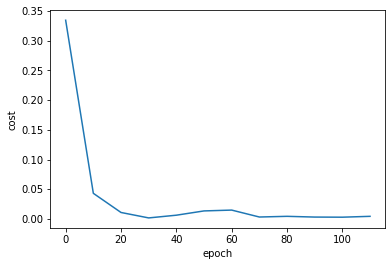

In [33]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)